In [95]:
import pandas as pd
import openai
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

openai.api_key = "YOUR_API_KEY_HERE"

In [88]:
def get_embedding(text: str, model="text-embedding-ada-002"):
    text = text.replace('\n', ' ')
    return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']

In [118]:
# Setup
pinyin = False
file_name = 'embedded_cn_surname_without_pinyin.csv'

# Load surname data
with open('baijiaxing.txt', 'r', encoding='utf-8') as file:
    cn_surname_file = file.read()

# Extract the text into characters
cn_surname_list = []
for line in cn_surname_file.split('\n'):
    for name in line.split(") "):
        if not name.endswith(")"):
            name += ")"
        if pinyin==False:
            name = name.split("(")[0]
        cn_surname_list.append(name)
        
# Get Embedding
df = pd.DataFrame(cn_surname_list)
df['ada_embedding'] = df.iloc[:,0].apply(lambda x: get_embedding(x))
df = df.rename(columns={0:"surname"})

# Add tSNE components
tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(df.ada_embedding.to_list()).T
df["tsne_1"] = tsne_X[0]
df["tsne_2"] = tsne_X[1]
tsne = TSNE(n_components=3)
tsne_X = tsne.fit_transform(df.ada_embedding.to_list()).T
df['tsne_3d_x'] = tsne_X[0]
df['tsne_3d_y'] = tsne_X[1]
df['tsne_3d_z'] = tsne_X[2]

# Save to a CSV file
df.to_csv(file_name, index=False)

E:\Software\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Software\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
E:\Software\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Software\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


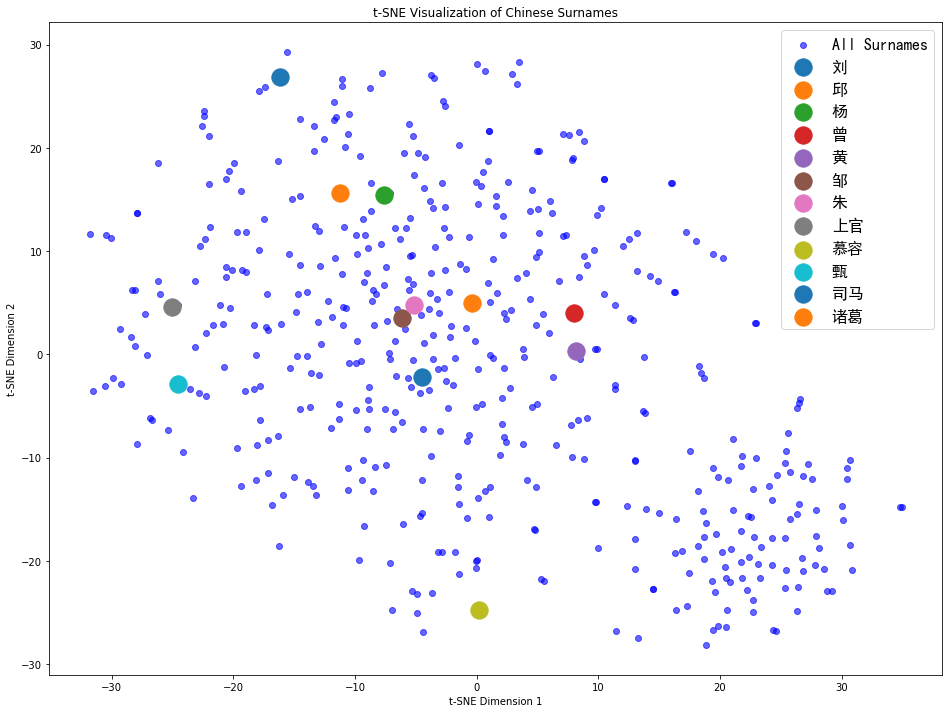

In [117]:
# Update the column names based on the actual structure of the DataFrame
x_values = df['tsne_1']
y_values = df['tsne_2']
surnames = df['surname']

# Initialize the plot
plt.figure(figsize=(16, 12))

# Plot all the surnames
plt.scatter(x_values, y_values, c='blue', label='All Surnames', alpha=0.6)

# Highlight specific surnames
highlighted_surnames = ['刘', '邱', '杨', '曾', '黄', '邹', '朱', '上官', '慕容', '甄', '司马', '诸葛'] #['刘', '李', '邹', '朱', '邱', '杨', '林', '黄', '张', '倪', '吕']
for surname in highlighted_surnames:
    filtered_df = df[df['surname'] == surname]
    plt.scatter(filtered_df['tsne_1'], filtered_df['tsne_2'], label=surname, s=300)

# Add labels and title
plt.title('t-SNE Visualization of Chinese Surnames')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Define the font properties
font = fm.FontProperties(family='SimHei', size=16)

# Add legend with specified font
plt.legend(prop=font)

# Show the plot
plt.show()

In [1]:
import plotly.express as px

# List of surnames to highlight
surnames_to_mark = ['刘', '邱', '杨', '曾', '黄', '邹', '朱', '上官', '慕容', '甄', '司马', '诸葛']

# Create a new column to indicate whether the surname should be highlighted
df['highlight'] = df['surname'].apply(lambda x: 'Marked' if x in surnames_to_mark else 'Unmarked')

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='tsne_3d_x', y='tsne_3d_y', z='tsne_3d_z',
                     color='highlight', labels={'highlight': 'Surname Category'},
                     hover_data=['surname'],
                     title='3D t-SNE of Chinese Surnames')

# Show the plot
fig.show()

E:\Software\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KeyboardInterrupt: 